## Sajid Mannan -- M3RG Lab -- Indian Institute of Technology, Delhi
## Date : 25December2022
## Symbolic reasoning informed machine learning model for glass hardness prediction ##


## LOADING LIBRARIES

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import torch.nn as nn
from torchvision import datasets, transforms
import torch.utils
from torch import optim
from torchvision.transforms import ToTensor
import torch
import time
from math import floor
from new_plot import *
torch.manual_seed(45)




## LOAD _ DATA

In [3]:
data  = pd.read_csv('/Users/sajid/Desktop/APL745_lab1_2021CEZ8288/146_ele.csv')
data = torch.Tensor(data.values)

## Scaling Data

In [4]:
max_d = data.max(0).values
min_d = data.min(0).values
data1 = data/max_d

In [5]:
X = data1[:, :-1]
y=data1[:, -1]

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
train_x = x_train[:,:-1]
test_x = x_test[:,:-1]
pp1 = x_train[:, -1]
pp2 = x_test[:, -1]

## Forward Pass

In [8]:
#Defining Model

## Forward Pass
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size):

        super(NeuralNetwork, self).__init__()
        self.relu = nn.ReLU()
        self.lin1 = nn.Linear(input_size, hidden1_size)
        self.lin2 = nn.Linear(hidden1_size, hidden2_size)
        self.lin3 = nn.Linear(hidden2_size, output_size)
        self.Dropout = nn.Dropout(p=0.1)
        
    def forward(self, x):

        out = self.lin1(x)
        out = self.Dropout(out)
        out = self.relu(out)
        out = self.lin2(out)
        out = self.Dropout(out)
        out = self.relu(out)
        out = self.lin3(out)        
        return out
    
## Defining loss function (self,y_pred, y_true,p):

    def loss(self,y_pred, y_true):
        return torch.div(((y_pred - y_true)**2).sum(0),len(y_pred))

    


In [9]:
## Hyperparmeters

input = 15 # (38*11)
h1 = 5     #5
h2 = 8   # 8
output =2   # (11*1)
model = NeuralNetwork(input, h1, h2, output)


## Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.000901 , weight_decay = 1e-5)  


print(model)

NeuralNetwork(
  (relu): ReLU()
  (lin1): Linear(in_features=15, out_features=5, bias=True)
  (lin2): Linear(in_features=5, out_features=8, bias=True)
  (lin3): Linear(in_features=8, out_features=2, bias=True)
  (Dropout): Dropout(p=0.1, inplace=False)
)


## Model Training

In [10]:
## Backpropogation
torch.manual_seed(45)
num_epochs = 23000
ntrain = 116
ntest = 30
ep_train_loss = []
ep_test_loss = []
tt = []
y_pred = []

# Train the model

for epoch in range(num_epochs):
    t1 = time.time()
    train_loss =0
    c =0
    x,y = train_x, train_y
    optimizer.zero_grad()
    p = pp1                       ### Load
    var = model(x)                ### Variable [C1,C2]
    var = torch.square(var)
    
    t1 = torch.div(var[:,0],2*p)
    t2 = var[:,1]
    t3 = var[:,0]**2 + 4*var[:,0]*var[:,1]*p
    t4 = torch.div(torch.sqrt(t3) , 2*p)
    y_pred = t1+t2+t3+t4                    # var[0] = c1. var[1] = c2  # var[0] = c1. var[1] = c2
    loss1 = model.loss(y_pred, y)
    loss1.backward()
    optimizer.step()
    ep_train_loss.append(loss1.item())
    
    model.eval()



## Test Model
# #In test phase, we don't need to compute gradients (for memory efficiency)
    with torch.no_grad():
        
        x,y = test_x, test_y   
        p = pp2
        var = model(x)
        var = torch.square(var)

        t1 = torch.div(var[:,0],2*p)
        t2 = var[:,1]
        t3 = var[:,0]**2 + 4*var[:,0]*var[:,1]*p
        t4 = torch.sqrt(t3)/(2*p)
        y_pred = t1+t2+t3+t4                      # var[0] = c1. var[1] = c2  # var[0] = c1. var[1] = c2
        loss2 = model.loss(y_pred, y)
        ep_test_loss.append(loss2.item())
        
        print("Train_Loss :", loss1, "Test_Loss:" ,loss2 )


Train_Loss : tensor(2.9748, grad_fn=<DivBackward0>) Test_Loss: tensor(1.0092)
Train_Loss : tensor(1.2889, grad_fn=<DivBackward0>) Test_Loss: tensor(0.8427)
Train_Loss : tensor(1.1088, grad_fn=<DivBackward0>) Test_Loss: tensor(0.7002)
Train_Loss : tensor(0.9509, grad_fn=<DivBackward0>) Test_Loss: tensor(0.5798)
Train_Loss : tensor(0.8144, grad_fn=<DivBackward0>) Test_Loss: tensor(0.4794)
Train_Loss : tensor(0.6979, grad_fn=<DivBackward0>) Test_Loss: tensor(0.3969)
Train_Loss : tensor(0.5995, grad_fn=<DivBackward0>) Test_Loss: tensor(0.3301)
Train_Loss : tensor(0.5174, grad_fn=<DivBackward0>) Test_Loss: tensor(0.2768)
Train_Loss : tensor(0.4497, grad_fn=<DivBackward0>) Test_Loss: tensor(0.2351)
Train_Loss : tensor(0.3945, grad_fn=<DivBackward0>) Test_Loss: tensor(0.2029)
Train_Loss : tensor(0.3499, grad_fn=<DivBackward0>) Test_Loss: tensor(0.1784)
Train_Loss : tensor(0.3143, grad_fn=<DivBackward0>) Test_Loss: tensor(0.1606)
Train_Loss : tensor(0.2863, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0914, grad_fn=<DivBackward0>) Test_Loss: tensor(0.1296)
Train_Loss : tensor(0.0905, grad_fn=<DivBackward0>) Test_Loss: tensor(0.1291)
Train_Loss : tensor(0.0897, grad_fn=<DivBackward0>) Test_Loss: tensor(0.1286)
Train_Loss : tensor(0.0888, grad_fn=<DivBackward0>) Test_Loss: tensor(0.1281)
Train_Loss : tensor(0.0879, grad_fn=<DivBackward0>) Test_Loss: tensor(0.1276)
Train_Loss : tensor(0.0870, grad_fn=<DivBackward0>) Test_Loss: tensor(0.1271)
Train_Loss : tensor(0.0862, grad_fn=<DivBackward0>) Test_Loss: tensor(0.1265)
Train_Loss : tensor(0.0853, grad_fn=<DivBackward0>) Test_Loss: tensor(0.1260)
Train_Loss : tensor(0.0845, grad_fn=<DivBackward0>) Test_Loss: tensor(0.1255)
Train_Loss : tensor(0.0837, grad_fn=<DivBackward0>) Test_Loss: tensor(0.1250)
Train_Loss : tensor(0.0828, grad_fn=<DivBackward0>) Test_Loss: tensor(0.1244)
Train_Loss : tensor(0.0820, grad_fn=<DivBackward0>) Test_Loss: tensor(0.1239)
Train_Loss : tensor(0.0812, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0279, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0420)
Train_Loss : tensor(0.0276, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0416)
Train_Loss : tensor(0.0274, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0413)
Train_Loss : tensor(0.0271, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0409)
Train_Loss : tensor(0.0268, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0406)
Train_Loss : tensor(0.0265, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0403)
Train_Loss : tensor(0.0263, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0399)
Train_Loss : tensor(0.0260, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0396)
Train_Loss : tensor(0.0257, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0393)
Train_Loss : tensor(0.0254, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0390)
Train_Loss : tensor(0.0252, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0386)
Train_Loss : tensor(0.0249, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0383)
Train_Loss : tensor(0.0247, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0085, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0176)
Train_Loss : tensor(0.0084, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0174)
Train_Loss : tensor(0.0083, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0171)
Train_Loss : tensor(0.0083, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0169)
Train_Loss : tensor(0.0082, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0167)
Train_Loss : tensor(0.0082, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0165)
Train_Loss : tensor(0.0081, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0164)
Train_Loss : tensor(0.0080, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0162)
Train_Loss : tensor(0.0080, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0161)
Train_Loss : tensor(0.0079, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0159)
Train_Loss : tensor(0.0079, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0158)
Train_Loss : tensor(0.0078, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0157)
Train_Loss : tensor(0.0078, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0047, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0106)
Train_Loss : tensor(0.0047, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0106)
Train_Loss : tensor(0.0046, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0106)
Train_Loss : tensor(0.0046, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0105)
Train_Loss : tensor(0.0046, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0105)
Train_Loss : tensor(0.0046, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0104)
Train_Loss : tensor(0.0046, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0104)
Train_Loss : tensor(0.0046, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0103)
Train_Loss : tensor(0.0046, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0103)
Train_Loss : tensor(0.0046, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0103)
Train_Loss : tensor(0.0046, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0102)
Train_Loss : tensor(0.0045, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0102)
Train_Loss : tensor(0.0045, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0038, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0071)
Train_Loss : tensor(0.0038, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0071)
Train_Loss : tensor(0.0038, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0071)
Train_Loss : tensor(0.0038, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0071)
Train_Loss : tensor(0.0038, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0071)
Train_Loss : tensor(0.0037, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0071)
Train_Loss : tensor(0.0037, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0070)
Train_Loss : tensor(0.0037, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0070)
Train_Loss : tensor(0.0037, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0070)
Train_Loss : tensor(0.0037, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0070)
Train_Loss : tensor(0.0037, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0070)
Train_Loss : tensor(0.0037, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0069)
Train_Loss : tensor(0.0037, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0033, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0055)
Train_Loss : tensor(0.0033, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0055)
Train_Loss : tensor(0.0033, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0055)
Train_Loss : tensor(0.0033, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0055)
Train_Loss : tensor(0.0033, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0054)
Train_Loss : tensor(0.0033, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0054)
Train_Loss : tensor(0.0033, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0054)
Train_Loss : tensor(0.0033, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0054)
Train_Loss : tensor(0.0033, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0054)
Train_Loss : tensor(0.0032, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0054)
Train_Loss : tensor(0.0032, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0054)
Train_Loss : tensor(0.0032, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0054)
Train_Loss : tensor(0.0032, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0029, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0047)
Train_Loss : tensor(0.0029, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0047)
Train_Loss : tensor(0.0029, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0046)
Train_Loss : tensor(0.0029, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0046)
Train_Loss : tensor(0.0029, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0046)
Train_Loss : tensor(0.0029, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0046)
Train_Loss : tensor(0.0029, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0046)
Train_Loss : tensor(0.0029, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0046)
Train_Loss : tensor(0.0029, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0046)
Train_Loss : tensor(0.0029, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0046)
Train_Loss : tensor(0.0029, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0046)
Train_Loss : tensor(0.0029, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0046)
Train_Loss : tensor(0.0029, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0026, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0042)
Train_Loss : tensor(0.0026, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0042)
Train_Loss : tensor(0.0026, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0042)
Train_Loss : tensor(0.0026, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0042)
Train_Loss : tensor(0.0026, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0042)
Train_Loss : tensor(0.0026, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0042)
Train_Loss : tensor(0.0026, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0042)
Train_Loss : tensor(0.0026, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0042)
Train_Loss : tensor(0.0026, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0042)
Train_Loss : tensor(0.0026, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0042)
Train_Loss : tensor(0.0025, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0042)
Train_Loss : tensor(0.0025, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0042)
Train_Loss : tensor(0.0025, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0023, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0040)
Train_Loss : tensor(0.0022, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0040)
Train_Loss : tensor(0.0022, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0040)
Train_Loss : tensor(0.0022, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0040)
Train_Loss : tensor(0.0022, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0040)
Train_Loss : tensor(0.0022, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0040)
Train_Loss : tensor(0.0022, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0040)
Train_Loss : tensor(0.0022, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0040)
Train_Loss : tensor(0.0022, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0040)
Train_Loss : tensor(0.0022, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0040)
Train_Loss : tensor(0.0022, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0040)
Train_Loss : tensor(0.0022, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0040)
Train_Loss : tensor(0.0022, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0020, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0038)
Train_Loss : tensor(0.0020, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0038)
Train_Loss : tensor(0.0020, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0038)
Train_Loss : tensor(0.0020, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0038)
Train_Loss : tensor(0.0020, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0038)
Train_Loss : tensor(0.0020, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0038)
Train_Loss : tensor(0.0020, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0038)
Train_Loss : tensor(0.0020, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0038)
Train_Loss : tensor(0.0020, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0038)
Train_Loss : tensor(0.0020, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0038)
Train_Loss : tensor(0.0019, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0038)
Train_Loss : tensor(0.0019, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0038)
Train_Loss : tensor(0.0019, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0017, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0036)
Train_Loss : tensor(0.0017, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0036)
Train_Loss : tensor(0.0017, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0036)
Train_Loss : tensor(0.0017, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0036)
Train_Loss : tensor(0.0017, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0036)
Train_Loss : tensor(0.0017, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0036)
Train_Loss : tensor(0.0017, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0036)
Train_Loss : tensor(0.0017, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0036)
Train_Loss : tensor(0.0017, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0036)
Train_Loss : tensor(0.0017, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0036)
Train_Loss : tensor(0.0017, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0036)
Train_Loss : tensor(0.0017, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0036)
Train_Loss : tensor(0.0017, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0015, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0015, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0015, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0015, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0015, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0015, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0015, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0015, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0015, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0015, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0015, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0015, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0015, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0014, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0014, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0014, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0014, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0014, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0014, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0014, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0014, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0014, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0014, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0014, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0014, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0014, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0013, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0013, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0013, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0013, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0013, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0013, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0013, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0013, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0013, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0013, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0013, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0013, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0035)
Train_Loss : tensor(0.0013, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0034)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0034)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0034)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0034)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0034)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0034)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0034)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0034)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0034)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0034)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0034)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0034)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0012, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0033)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0032)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0032)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0032)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0032)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0032)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0032)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0032)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0032)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0032)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0032)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0032)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0032)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0031)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0031)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0031)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0031)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0031)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0031)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0031)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0031)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0031)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0031)
Train_Loss : tensor(0.0011, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0031)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0031)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0030)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0029)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0010, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0028)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0027)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0009, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0025)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0025)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0026)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0025)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0025)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0025)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0025)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0025)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0025)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0025)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0024)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0024)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0024)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0024)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0024)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0024)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0024)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0024)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0024)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0024)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0024)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0024)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0023)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0022)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0008, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0019)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0020)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: tensor(0.0021)
Train_Loss : tensor(0.0007, grad_fn=<DivBackward0>) Test_Loss: t

## Saving Trained Model

In [11]:
torch.save(model,'/Users/sajid/Desktop/APL745_lab1_2021CEZ8288/SRIML_model.pt')

In [12]:
model = torch.load('/Users/sajid/Desktop/APL745_lab1_2021CEZ8288/SRIML_model.pt')
model.eval()

NeuralNetwork(
  (relu): ReLU()
  (lin1): Linear(in_features=15, out_features=5, bias=True)
  (lin2): Linear(in_features=5, out_features=8, bias=True)
  (lin3): Linear(in_features=8, out_features=2, bias=True)
  (Dropout): Dropout(p=0.1, inplace=False)
)

## Plotting Loss Curve

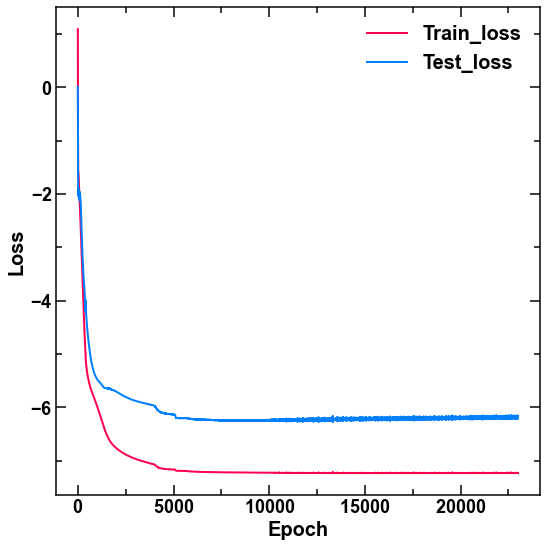

In [13]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
epoch = [i for i in range(num_epochs)]
fig, ax = plt.subplots(figsize=[8,8])
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.plot(epoch,np.log(ep_train_loss) , color = "#FF004F")
ax.plot(epoch,np.log(ep_test_loss), color = '#007FFF')
ax.legend(["Train_loss", "Test_loss"], loc='upper right')
plt.tight_layout()
plt.savefig('loss.tif',format='tif', dpi=1200)
plt.show()

## Error Metric

In [14]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def get_score(base='Training', actual=0,predicted=0):
    r2 = r2_score(actual,predicted)                    ## R2 Score
    mae = mean_absolute_error(actual,predicted)        ## Mean absolute error
    mse = mean_squared_error(actual,predicted)         ## Mean square error
    print(base,r2.round(3),mae.round(3),mse.round(3))
    return r2,mae,mse

In [15]:
def pred_const(example):
    return (torch.square(model(example)))

In [16]:
def pred_hard(example,p):
    t1 = torch.div(pred_const(example)[:,0],2*p)
    t2 = pred_const(example)[:,1]
    t3 = pred_const(example)[:,0]**2 + 4*pred_const(example)[:,0]*pred_const(example)[:,1]*p
    t4 = torch.div(torch.sqrt(t3) , 2*p)
    return t1+t2+t3+t4 
    

In [17]:
r,m,s =(get_score('Training:',actual=train_y.detach().numpy(),predicted=pred_hard(train_x,pp1).detach().numpy()))
l,n,p =(get_score('Test :',actual=test_y.detach().numpy(),predicted=pred_hard(test_x,pp2).detach().numpy()))
print(f'Training: R2 = {r}, mae = {m}, mse = {s}')
print(f'Training: R2 = {l}, mae = {n}, mse = {p}')

Training: 0.979 0.016 0.001
Test : 0.948 0.029 0.002
Training: R2 = 0.9794062923425635, mae = 0.015720056369900703, mse = 0.0007236720412038267
Training: R2 = 0.9479548086847105, mae = 0.028738953173160553, mse = 0.002054494107142091


## Renormalization

In [18]:
def renorm_pred_hard(example,p):
    return pred_hard(example,p)*max_d[-1]
def renorm_act_hard(example):
    return example*max_d[-1]
def renorm_load(p):
    return p*max_d[-2]

In [19]:
y1 = renorm_act_hard(train_y).detach().numpy()
y2 = renorm_pred_hard(train_x,pp1).detach().numpy()
y1_test = renorm_act_hard(test_y).detach().numpy()
y2_test = renorm_pred_hard(test_x,pp2).detach().numpy()

## Regression Plots

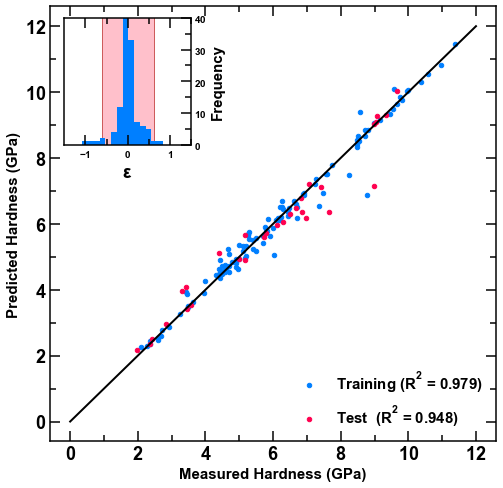

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
#plt.figure(figsize=(8,8))
fig,ax1 = plt.subplots(figsize =(8,8))
ax1.scatter(y1,y2, s =20,color =['#007FFF'])
ax1.scatter(y1_test,y2_test, s =20,color =["#FF004F"])


ax1.legend(['Training ($R^2$ = 0.979)','Test  ($R^2$ = 0.948)'], loc = 'lower right',fontsize = 15)
# # Add axis labels
ax1.set_ylabel('Predicted Hardness (GPa)',fontsize = 15)
ax1.set_xlabel('Measured Hardness (GPa)', fontsize = 15)
plt.plot([0, 12], [0, 12],color='black') #label 
left, bottom, width, height = [0.15, 0.64, 0.22, 0.22]
ax2 = fig.add_axes([left, bottom, width, height])
std=np.std(y2-y1)
mean=np.mean(y2-y1)
xx=mean-2*std # 0.21-(2*std)
yy = 0
mean = np.mean(y2-y1)
rec = patches.Rectangle((xx,yy),4*std,45, facecolor ='pink',edgecolor='indianred')
ax2.add_patch(rec)
y,x,__ = plt.hist(y2-y1, bins =20,color=['#007FFF'])
ax2.xaxis.set_major_locator(plt.MaxNLocator(3))
ax2.set_xlim([-1.5,1.5])
xlabel_ax2 = ax2.get_xticklabels()
ax2.yaxis.tick_right()
ax2.yaxis.set_tick_params(labelsize =10)
ax2.xaxis.set_tick_params(labelsize =10)
ax2.set_ylim(0,40)
ax2.yaxis.set_label_position("right")
ax2.set_ylabel('Frequency',fontsize=15)
ax2.set_xlabel(r'$\epsilon$',fontsize=18)

plt.savefig('reg.tif',format='tif', dpi=300)
# plt.show()

## Prediction on new data

In [98]:
dn2 = pd.read_csv('NS_136.csv')

In [99]:
dm2 = torch.Tensor(dn2.values)

In [100]:
dx2 = dm2/max_d

In [101]:
new_x2 = dx2[:,:-2]
load2 = dx2[:,-2]
hardness2 = dx2[:, -1]


In [102]:
H_inf = (pred_const(new_x2)*max_d[-1])[:,1]
H_inf

tensor([4.3976, 4.3976, 4.3976, 4.3976, 4.3976, 4.3976, 4.3976],
       grad_fn=<SelectBackward0>)

In [103]:
renorm_pred_hard(new_x2,load2)

tensor([7.6803, 6.5395, 6.0845, 5.6576, 5.2564, 4.9893, 4.7635],
       grad_fn=<MulBackward0>)

In [104]:
renorm_act_hard(hardness2)

tensor([6.0730, 5.2405, 4.9092, 4.6093, 4.4009, 4.1045, 4.0112])

In [105]:
renorm_load(load2)

tensor([0.1000, 0.2000, 0.3000, 0.5000, 1.0000, 2.0000, 5.0000])

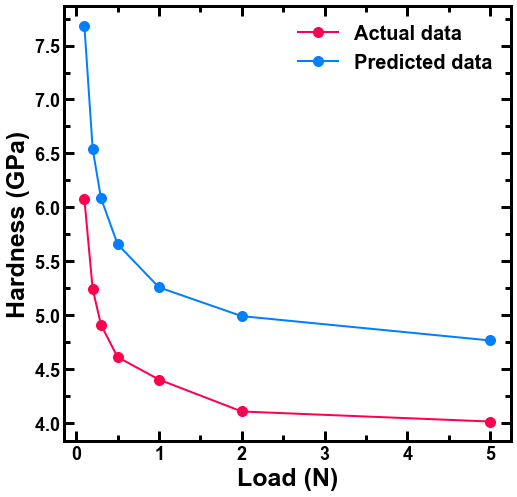

In [106]:
from pylab import rcParams
fig, ax = plt.subplots(figsize = (8,8))
plt.setp(ax.spines.values(), linewidth=3)
plt.plot(renorm_load(load2),renorm_act_hard(hardness2),'-o',color ='#FF004F')

plt.plot(renorm_load(load2),renorm_pred_hard(new_x2,load2).detach().numpy(),'-o',color = '#007FFF')
plt.tick_params(axis="x", which= "both",width = 3)
plt.tick_params(axis="y", which= "both" , width = 3)

plt.xlabel('Load (N)', fontsize = 25)
plt.ylabel('Hardness (GPa)',fontsize = 25)
plt.legend(["Actual data", "Predicted data", "H_infinity"], loc='upper right', fontsize = 20)

plt.savefig('NS_136.png',bbox_inches='tight', dpi=1200, pad_inches = 0)

Text(0.5, 1.0, 'NS')

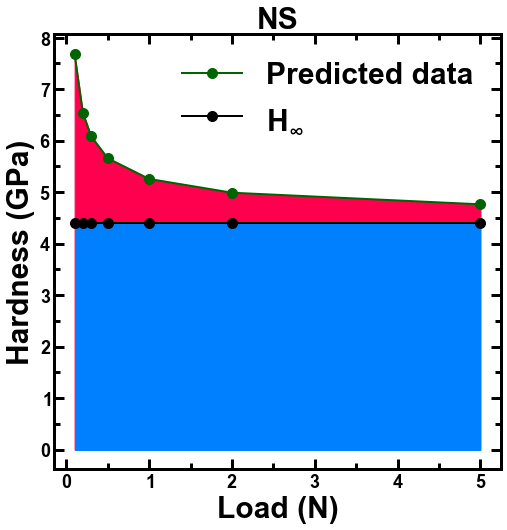

In [108]:
from pylab import rcParams
fig, ax = plt.subplots(figsize = (8,8))
plt.setp(ax.spines.values(), linewidth=3)
plt.plot(renorm_load(load2),renorm_pred_hard(new_x2,load2).detach().numpy(),'-o',color = 'darkgreen')
plt.plot(renorm_load(load2),H_inf.detach().numpy(),'-o',color = 'black')
plt.tick_params(axis="x", which= "both",width = 3)
plt.tick_params(axis="y", which= "both" , width = 3)
plt.xlabel('Load (N)', fontsize = 30)
plt.ylabel('Hardness (GPa)',fontsize = 30)
plt.legend(["Predicted data", "$H_{"+(u"\u221e")+"}$"], loc='upper right', fontsize = 30)

plt.fill_between(renorm_load(load2), renorm_pred_hard(new_x2,load2).detach().numpy(), color = '#FF004F')
plt.fill_between(renorm_load(load2), H_inf.detach().numpy(), color = '#007FFF')
plt.yticks(np.arange(0, 9, 1))
plt.title('NS',fontsize =30)

## Data Visualization

In [37]:
data  = pd.read_csv('/Users/sajid/Desktop/APL745_lab1_2021CEZ8288/146_ele.csv')

In [38]:
X_train=data.iloc[:,:-2]

In [39]:
X_train

,Al,B,Ba,Ca,Cs,Fe,K,Li,Mg,N,Na,O,Si,Ti,Y
0,3.508772,7.017544,8.771930,7.017544,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,59.649123,14.035088,0.0,0.000000
1,3.508772,7.017544,8.771930,7.017544,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,59.649123,14.035088,0.0,0.000000
2,3.508772,7.017544,8.771930,7.017544,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,59.649123,14.035088,0.0,0.000000
3,3.508772,7.017544,8.771930,7.017544,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,59.649123,14.035088,0.0,0.000000
4,3.508772,7.017544,7.017544,8.771930,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,59.649123,14.035088,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,8.457711,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.089552,0.0,60.348259,14.278607,0.0,14.825871
142,8.457711,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.089552,0.0,60.348259,14.278607,0.0,14.825871
143,8.457711,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.089552,0.0,60.348259,14.278607,0.0,14.825871
144,8.457711,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.089552,0.0,60.348259,14.278607,0.0,14.825871


In [40]:
ff = pd.DataFrame(X_train.astype(bool).sum(axis=0).sort_values(ascending=False))
ff3= ff.values.tolist()
ff2 = [ item for elem in ff3 for item in elem]


In [41]:
(data.columns)

Index(['Al', 'B', 'Ba', 'Ca', 'Cs', 'Fe', 'K', 'Li', 'Mg', 'N', 'Na', 'O',
       'Si', 'Ti', 'Y', 'LOAD', 'HARDNESS'],
      dtype='object')

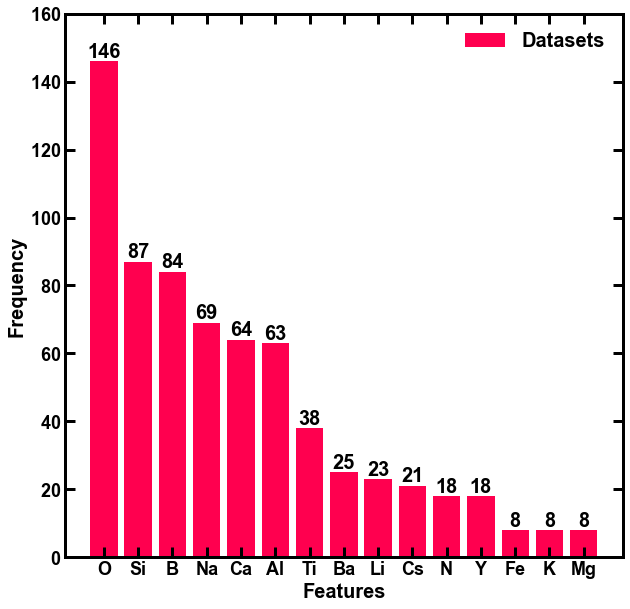

In [42]:
ff1 = []
for i in range(15):
    ff1.append(ff.index[i])
fig, ax = plt.subplots(figsize = (10,10))
plt.setp(ax.spines.values(), linewidth=3)

plt.bar(ff1, ff2, color = ["#FF004F"])
plt.minorticks_off()
plt.tick_params(axis="x", which="major", width = 3)
plt.tick_params(axis="y", which="major", width = 3)
for i in range(len(ff2)):
    plt.annotate(str(ff2[i]),xy=(ff1[i],ff2[i]),ha='center', va='bottom')
plt.xlabel('Features', fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.ylim([0,160])
plt.legend(["Datasets"])
plt.savefig('SRIML.png')

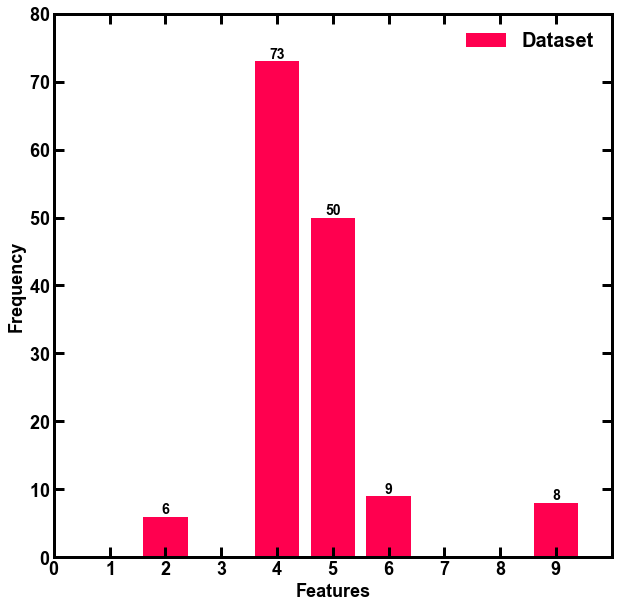

In [44]:
fig, ax = plt.subplots(figsize = (10,10))
plt.setp(ax.spines.values(), linewidth=3)
zz_test = pd.DataFrame(X_train.astype(bool).sum(axis=1).value_counts())
zz3_test= zz_test.values.tolist()
zz2_test = [ i for e in zz3_test for i in e]

zz1_test = []
for i in range(zz_test.shape[0]):
    zz1_test.append(zz_test.index[i])

plt.bar(zz1_test, zz2_test, color = ["#FF004F"])

for i in range(len(zz2_test)):
    plt.annotate(str(zz2_test[i]),xy=(zz1_test[i],zz2_test[i]),ha='center', va='bottom', fontsize = 14)

plt.xlabel('Features', fontsize = 18)
plt.ylabel('Frequency',fontsize = 18)

plt.tick_params(axis="x", which="major", width = 3)
plt.tick_params(axis="y", which="major", width = 3)

plt.minorticks_off()
plt.legend(["Dataset"])
plt.ylim([0,80])
plt.xlim([0,10])
plt.xticks(np.arange(0, 10, 1))
plt.savefig('comp.tif',bbox_inches='tight',format='tif', dpi=300, pad_inches = 0)
plt.show()

(0.0, 32.0)

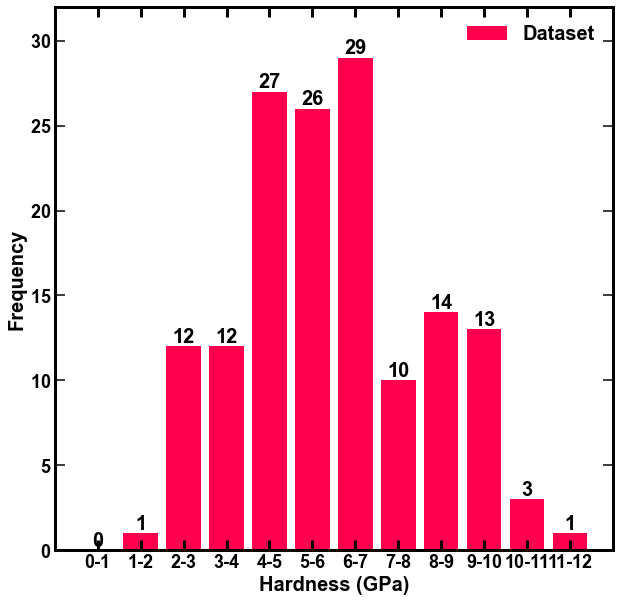

In [45]:

xx = []
for i in range(0,12):
    xx.append(str(i) + '-' + str(i+1))
s = data['HARDNESS']
p_test = []
for i in range(0,12):
    p_test.append(s.between(i,i+1).sum())
  


fig, ax = plt.subplots(figsize = (10,10))
plt.setp(ax.spines.values(), linewidth=3)

plt.bar(xx, p_test,linewidth=1, color = ['#FF004F'])
ind = np.arange(len(xx))
for i in range(len(p_test)):
    plt.annotate(str(p_test[i]),xy=(ind[i],p_test[i]),ha='center', va='bottom',fontsize = 20) 

plt.xlabel("Hardness (GPa)", fontsize = 20)
plt.ylabel("Frequency", fontsize = 20)
plt.xticks(ticks=np.arange(0,13))
plt.minorticks_off()
plt.legend(["Dataset"],fontsize = 20)
plt.tick_params(axis="x", which="major", width = 3)
plt.ylim([0,32])


Text(0, 0.5, 'Frequency')

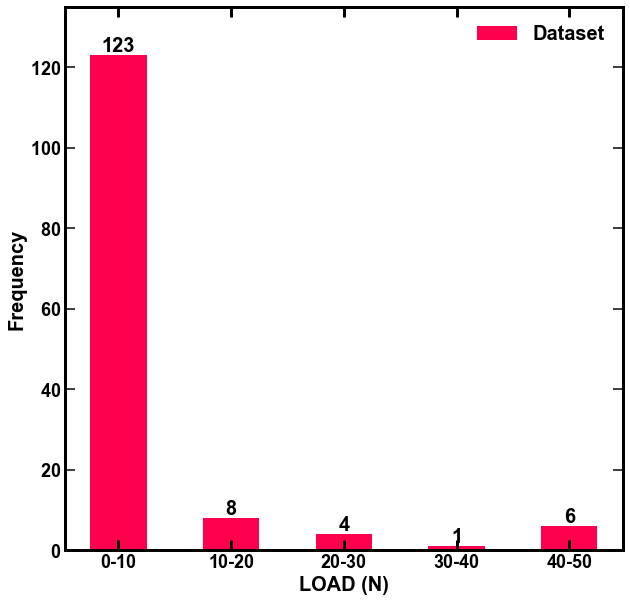

In [46]:
xy = []
for i in range(0,5):
    xy.append(str(10*i) + '-' + str(10*(i+1)))
    s = data['LOAD']

p_load = []
for i in range(0,5):
    p_load.append(s.between(10*i,10*(i+1)).sum())

fig, ax = plt.subplots(figsize = (10,10))
plt.setp(ax.spines.values(), linewidth=3)

plt.minorticks_off()
ind = np.arange(len(xy))
for i in range(len(p_load)):
    plt.annotate(str(p_load[i]),xy=(ind[i],p_load[i]),ha='center', va='bottom',fontsize = 20)
plt.tick_params(axis="x", which="major", width = 3)
plt.bar(xy, p_load,linewidth=1, width = 0.5, color = ['#FF004F'])    
plt.ylim([0,135])
plt.legend(["Dataset"],fontsize = 20)
plt.xlabel("LOAD (N)", fontsize = 20)
plt.ylabel("Frequency", fontsize = 20)